## Feature Engineering

In feature engineering, we would perform the following steps:
1. Convert the speechiness column to represent the presence of spoken words in a track. 
2. Remove the skewness of the data for continuous numerical features for prediction using regression algorithm.
3. Encoding the categorical variables.
4. Standardise the values of the variables to the same range.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('E://DS Projects//Spotify Song Prediction//dataset.csv')

Before doing feature engineering, usually, we would perform the train-test-split. We would perform the feature engineering and feature selection individually on the test and training data. But lets see the results first without splitting the data initially.

In [4]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
data.shape

(114000, 21)

In [6]:
data.drop(data.columns[0], axis=1, inplace=True)

In [7]:
data=data.dropna()

In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(113549, 20)

#### Working on the speechiness column.

From the data description, the speechiness column detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

So we can convert this column to discrete features. High, medium and low speechiness based on the range. 
1. High for Values above 0.66
2. Medium for Values between 0.33 and 0.66
3. Low for values below 0.33

In [10]:
data['speechiness'].sort_values()

101681    0.000
98779     0.000
101663    0.000
101666    0.000
101667    0.000
          ...  
18227     0.962
18432     0.962
18530     0.963
18504     0.963
18152     0.965
Name: speechiness, Length: 113549, dtype: float64

In [11]:
data['speechiness'].dtypes

dtype('float64')

Now, we would make a new column for the speechiness which wouuld depict whether the track has high, low or medium speechiness. 

In [12]:
speechiness_type=[]
for i in data.speechiness:
    if i<0.33:
        speechiness_type.append('Low')
    elif 0.33<=i<=0.66:
        speechiness_type.append('Medium')
    else:
        speechiness_type.append('High')

In [13]:
data['speechiness_type']=speechiness_type
print(data.speechiness_type.value_counts())
data.head()

Low       109947
Medium      2726
High         876
Name: speechiness_type, dtype: int64


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Low


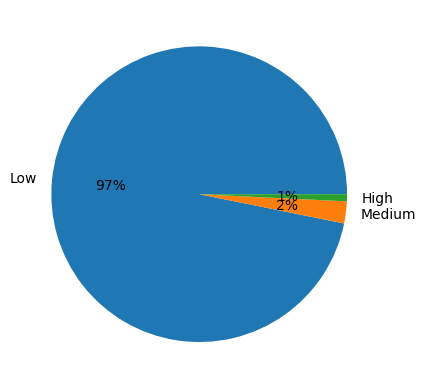

In [14]:
plt.pie(x=data['speechiness_type'].value_counts(),labels=data['speechiness_type'].unique(), autopct='%.0f%%')
plt.show()

So, 97% of tracks have low speechiness. Which means that most of the tracks are melodies rather than raps.

###### Lets check the relationship of the speechisess type with popularity.

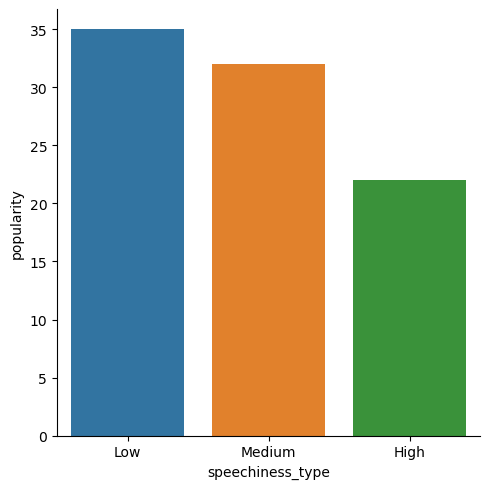

In [15]:
sns.catplot(data=data, x='speechiness_type', y='popularity', kind='bar', ci=None, estimator=np.median)
plt.show()

The median popularity of the tracks with low speechiness is high. It shows that people like more melodious songs as compared to rap songs.

### Skewness

For regression models, we have to deal with the skewness of the continuous data. If the data is skewed, the regression models would not give good results for prediction.But for other models lie decission tree, random forest etc. we do not need to modify the skewness. 
In this dataset, we saw that most of the continuous columns a are skewed. We have to modify them for regression models.<br>
From EDA we had found that the continuous features did not have a great correlation with the target variable popularity. So we can reduce their skewness and see the results.

Transforming the features to gaussian distribution for regression models.<br>
**Gaussian Transformation**

In [16]:
#Selecting the numerical features:
feature_numerical=[feature for feature in data.columns if data[feature].dtypes!='O']

In [17]:
#Selecting the discrete numerical features
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50]

In [18]:
#Selecting the continuous features
feature_continuous_numerical=[feature for feature in feature_numerical if feature not in feature_discrete_numerical]
feature_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [19]:
from scipy.stats import skew

In [20]:
from scipy import stats

popularity skewness is:  0.04222809948109981


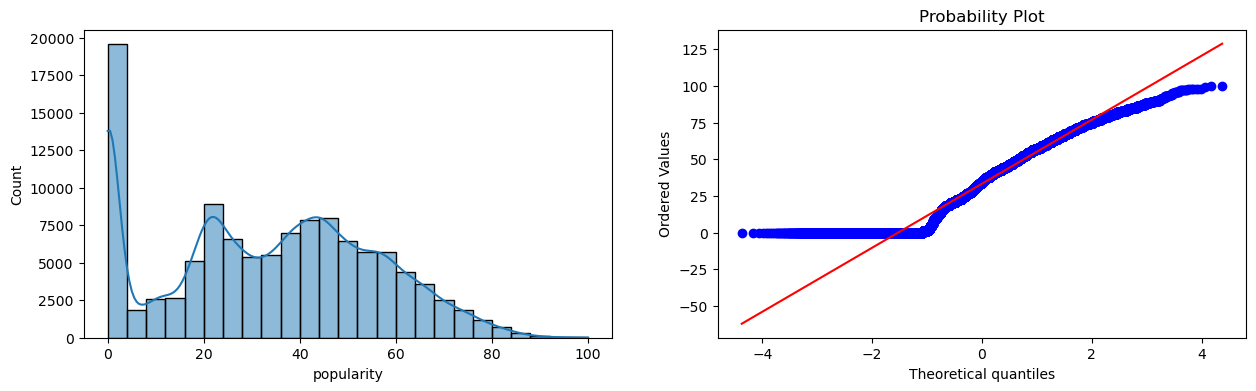

duration_ms skewness is:  10.814434004933338


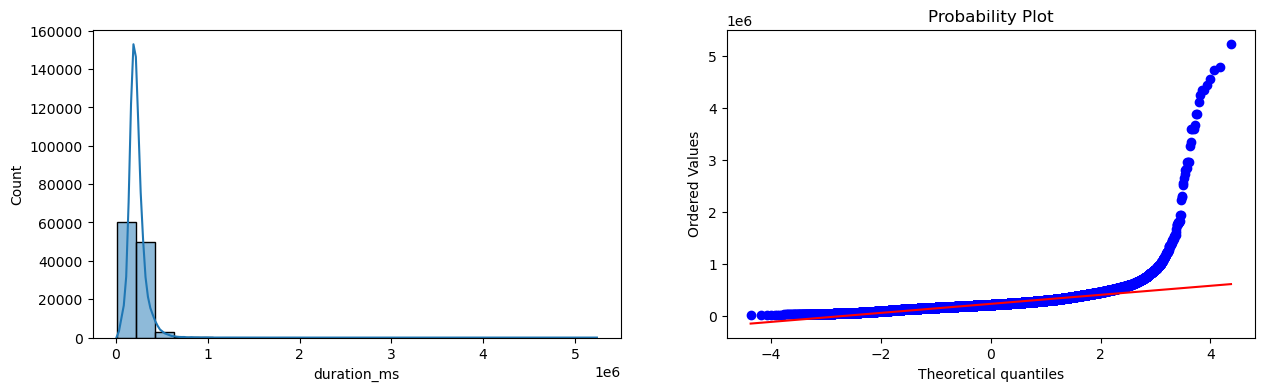

danceability skewness is:  -0.4003991295600715


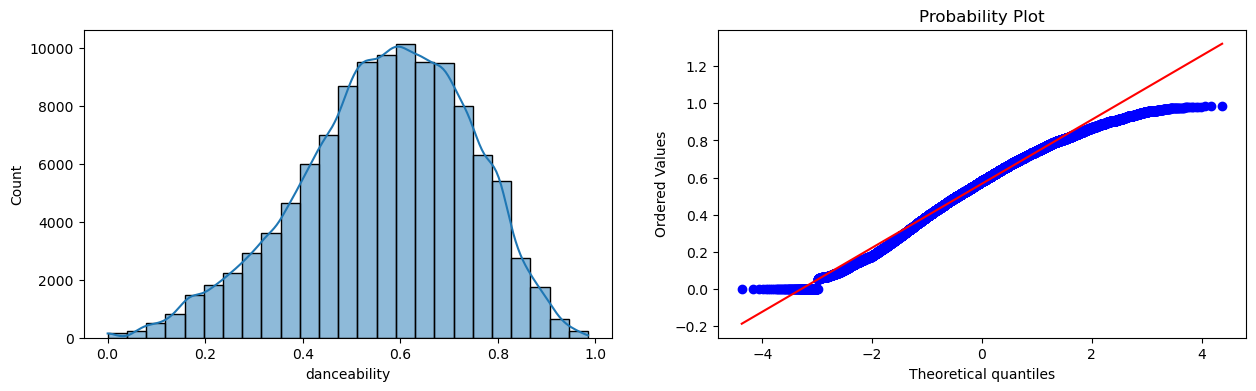

energy skewness is:  -0.598542182428158


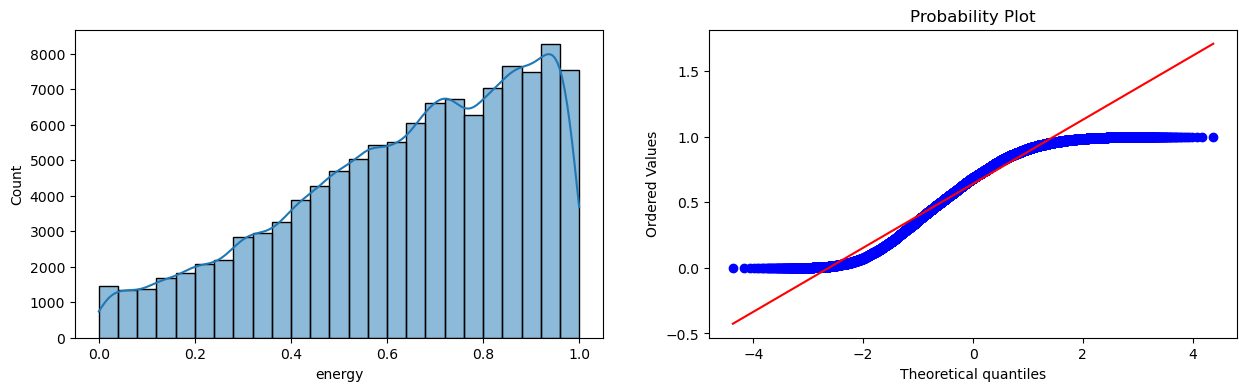

loudness skewness is:  -2.0133133823721505


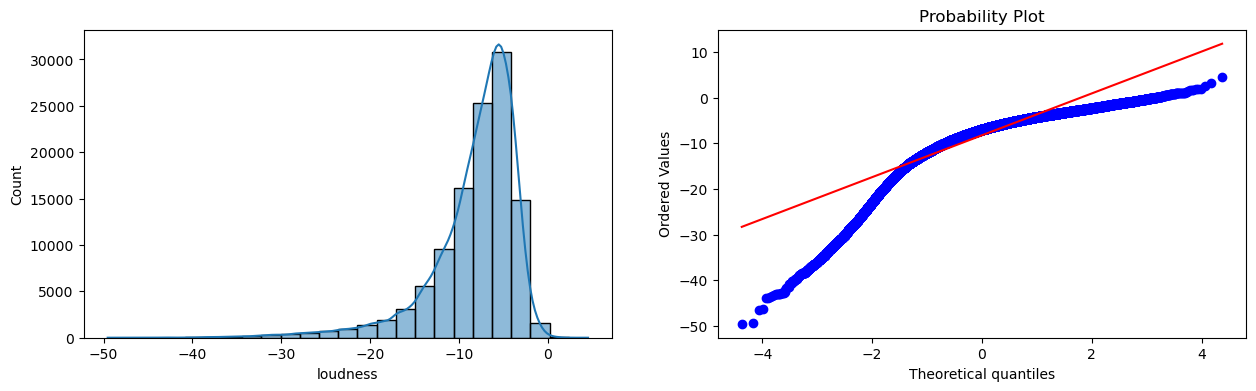

speechiness skewness is:  4.644508700286168


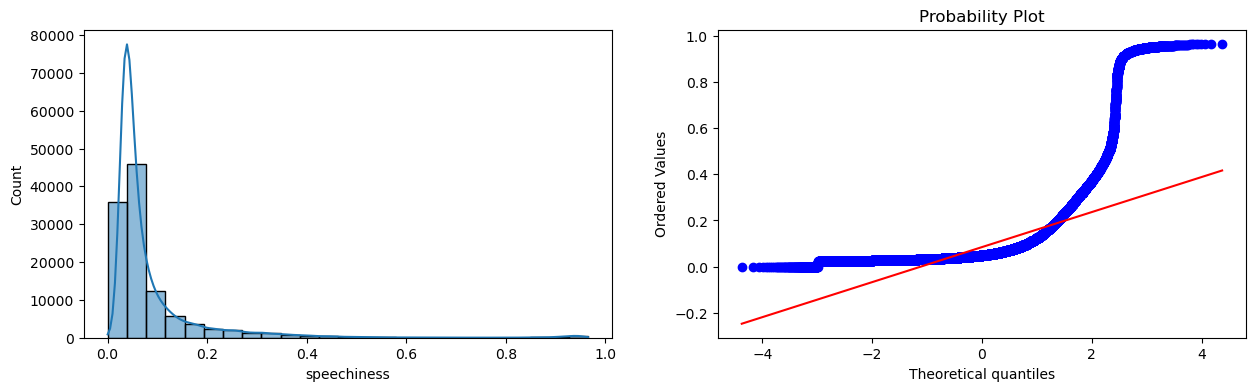

acousticness skewness is:  0.7302103030827026


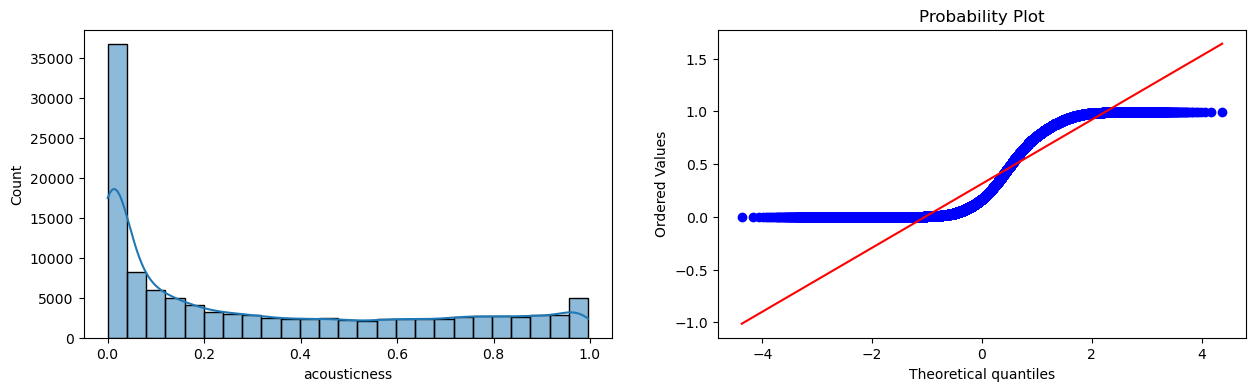

instrumentalness skewness is:  1.7377466866935405


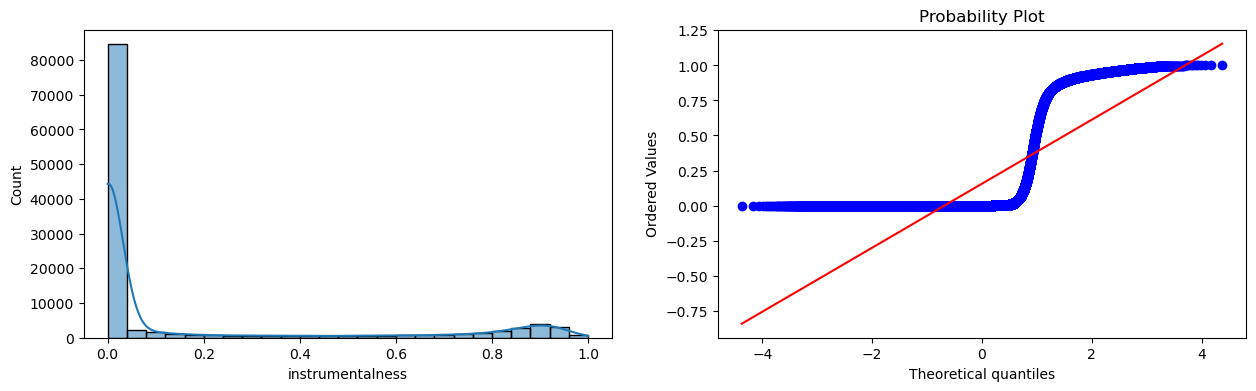

liveness skewness is:  2.1054497237799685


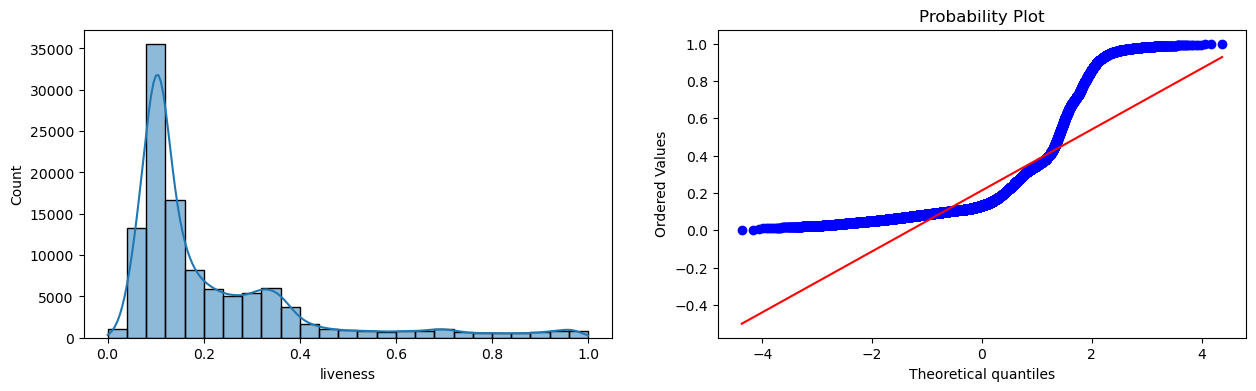

valence skewness is:  0.11477275798096229


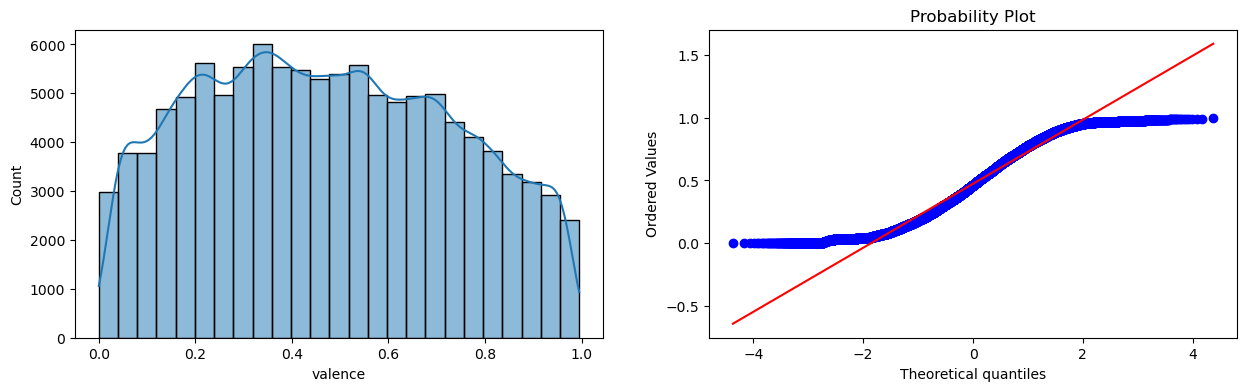

tempo skewness is:  0.23160111991386964


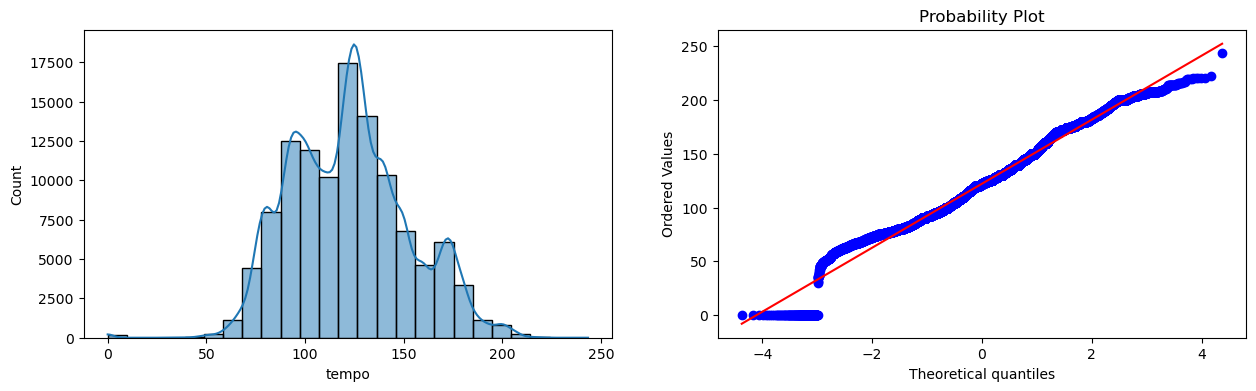

In [21]:
for feature in feature_continuous_numerical:
    dataset=data.copy()
    print(feature, 'skewness is: ', skew(dataset[feature]))
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    sns.histplot(x=feature, data=dataset, bins=25, kde=True)
    
    plt.subplot(1,2,2)
    stats.probplot(dataset[feature], dist='norm', plot=plt)
    
    plt.show()

**Performing log-transformation**

In [22]:
dataset_log=data.copy()
dataset_log.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Low


In [23]:
for feature in feature_continuous_numerical:
    dataset_log[feature]=np.log(dataset_log[feature]+1)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
dataset_log.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,4.304065,12.348730,False,0.516410,0.379121,1,NaN,0,0.133656,0.031692,0.000001,0.306013,0.539413,4.487703,4,acoustic,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,4.025352,11.915794,False,0.350657,0.153579,1,NaN,1,0.073529,0.654406,0.000006,0.096219,0.236652,4.362958,4,acoustic,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,4.060443,12.258793,False,0.363253,0.306749,0,NaN,1,0.054204,0.190620,0.000000,0.110647,0.113329,4.348108,4,acoustic,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,4.276666,12.215696,False,0.235862,0.057891,0,NaN,1,0.035657,0.644482,0.000071,0.123986,0.133656,5.208064,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,4.418841,12.200326,False,0.481191,0.366724,2,NaN,1,0.051263,0.384582,0.000000,0.079643,0.154436,4.795369,4,acoustic,Low


popularity skewness is:  -1.3582344590230757


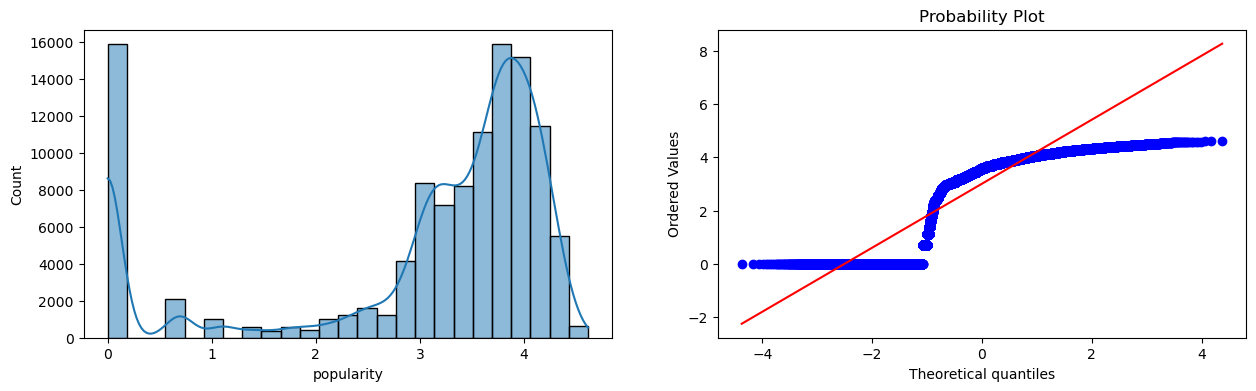

duration_ms skewness is:  -0.31958068443270016


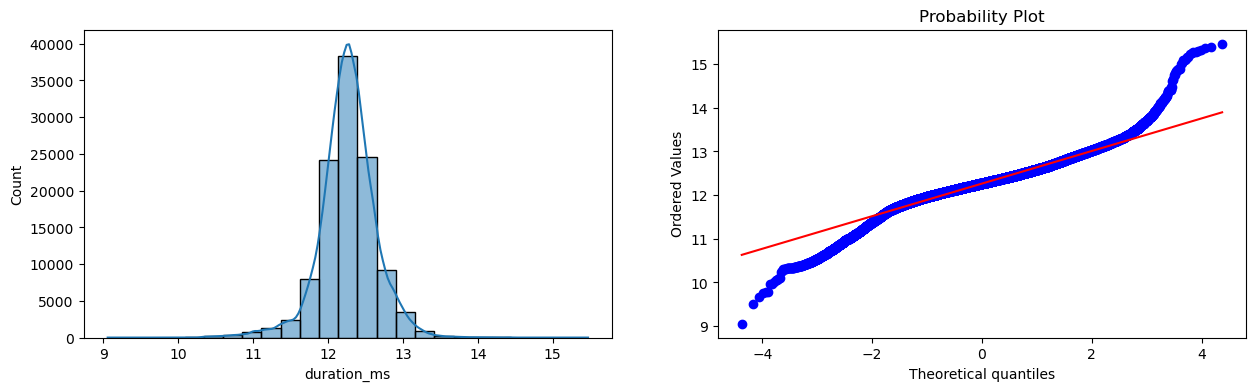

danceability skewness is:  -0.7033043814280042


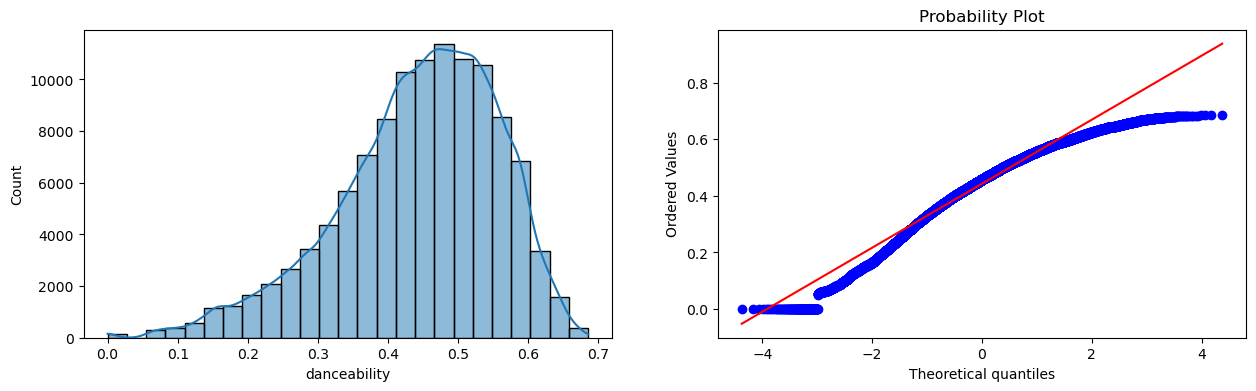

energy skewness is:  -0.8969101507400357


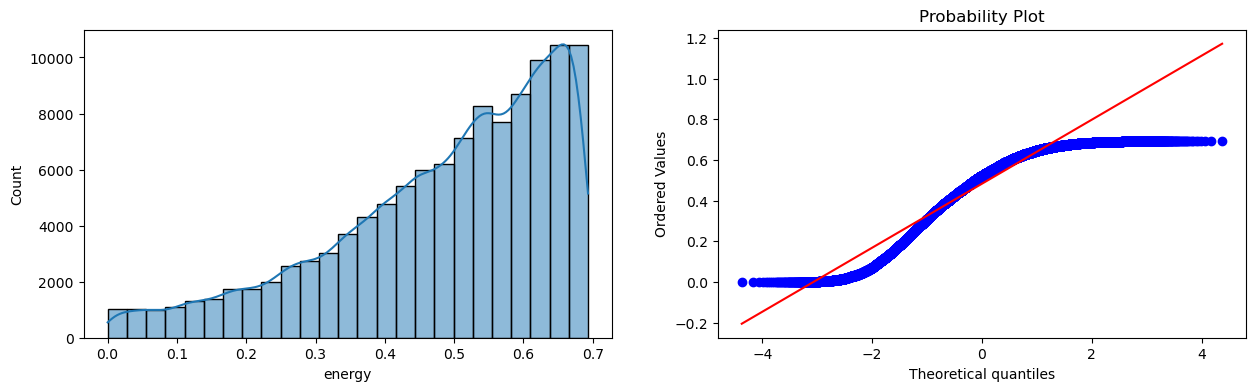

loudness skewness is:  nan


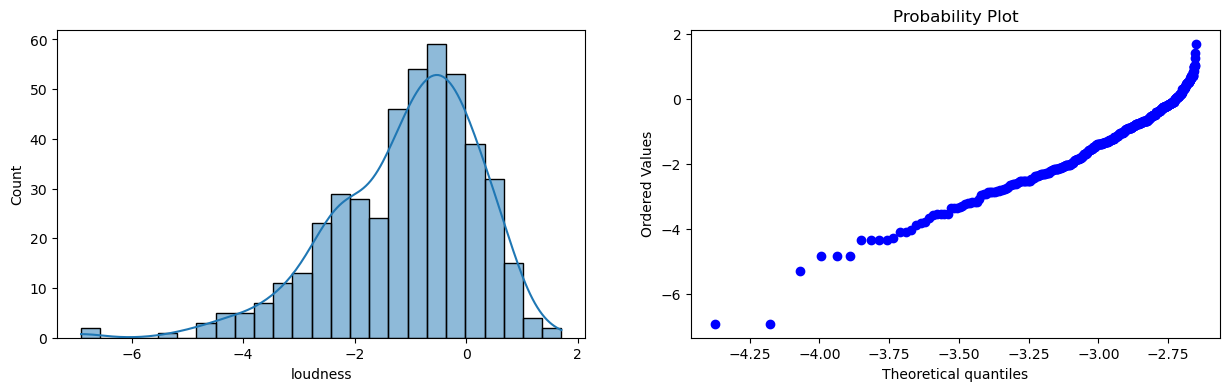

speechiness skewness is:  3.7094268216147412


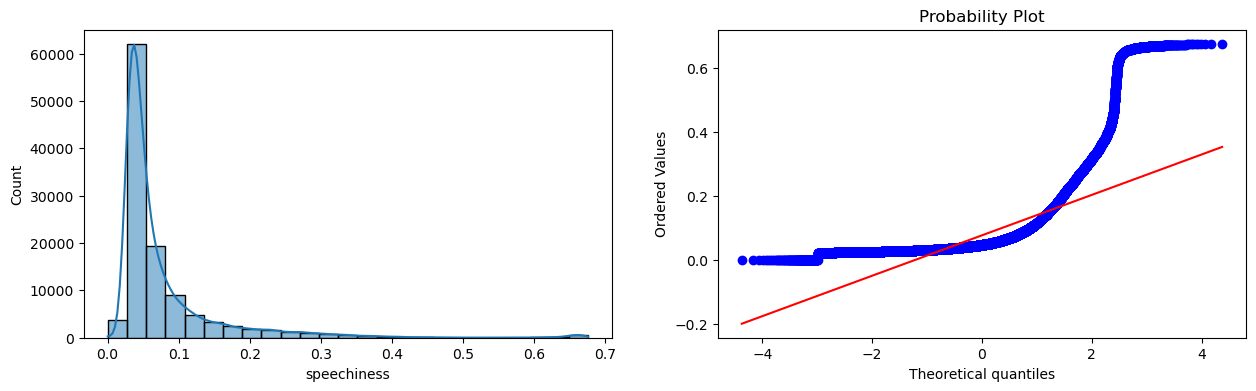

acousticness skewness is:  0.5532779927877304


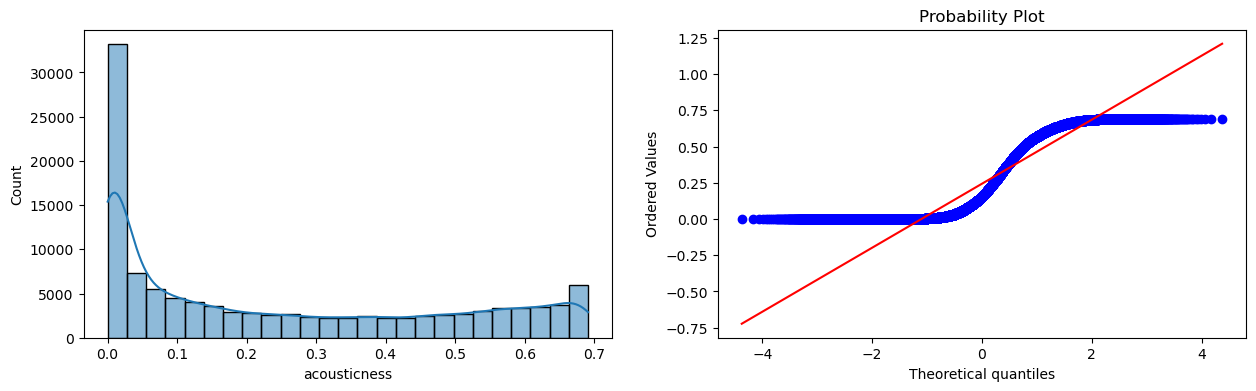

instrumentalness skewness is:  1.6547543527716166


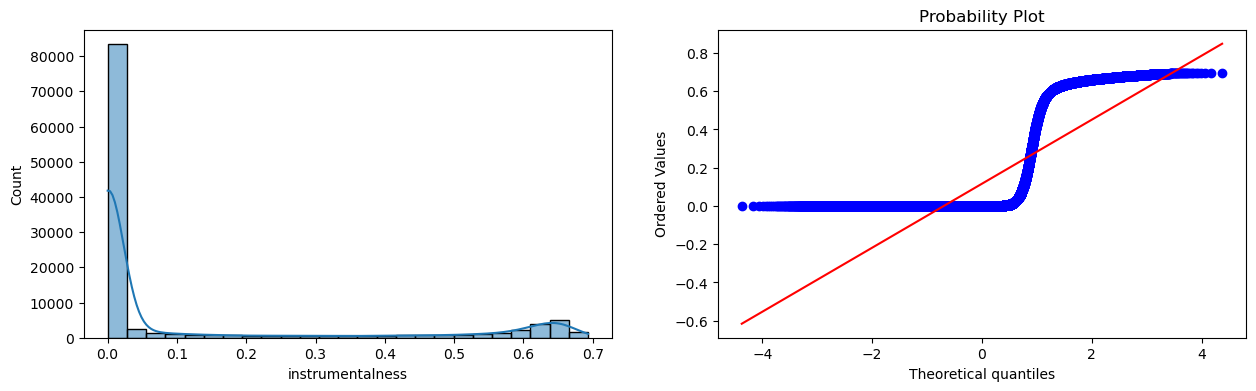

liveness skewness is:  1.7355487100916003


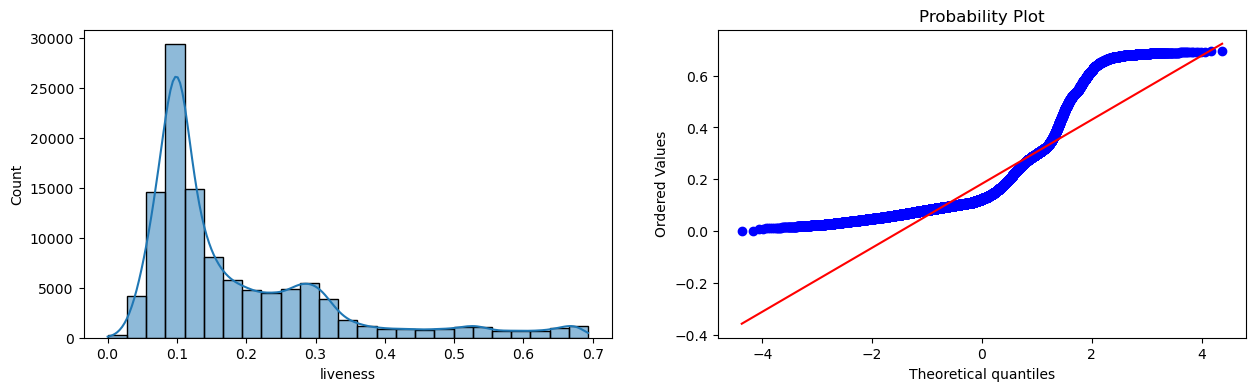

valence skewness is:  -0.14268054744317982


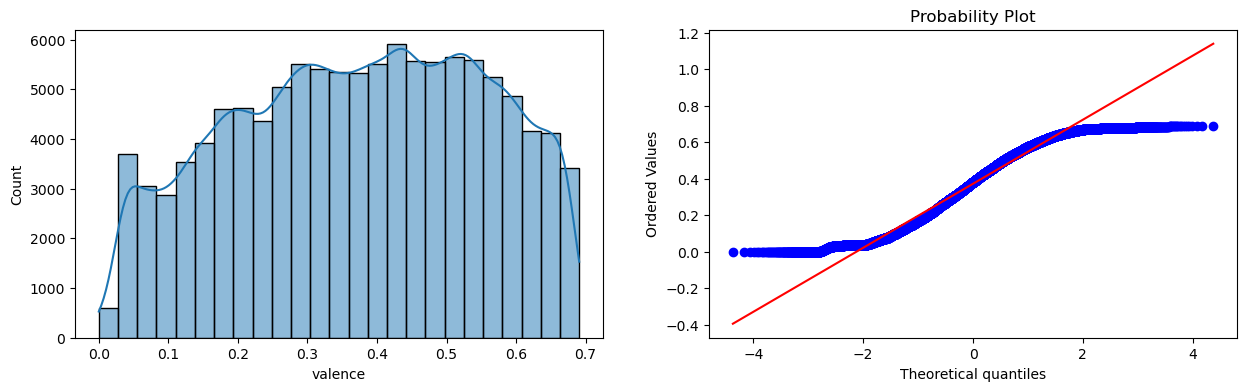

tempo skewness is:  -5.502750438724598


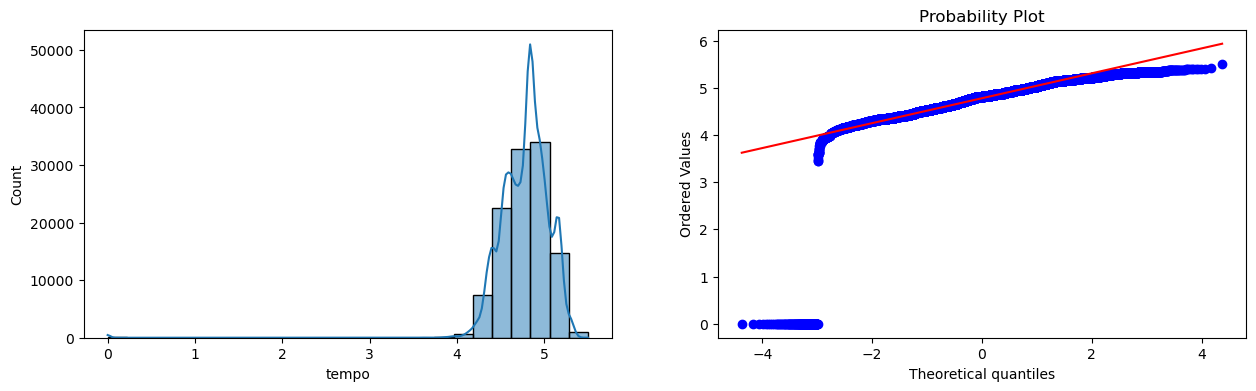

In [25]:
for feature in feature_continuous_numerical:
    print(feature, 'skewness is: ', skew(dataset_log[feature]))
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    sns.histplot(x=feature, data=dataset_log, bins=25, kde=True)
    
    plt.subplot(1,2,2)
    stats.probplot(dataset_log[feature], dist='norm', plot=plt)
    
    plt.show()

**Obseravtion:**
1. The log transformation did well on duration_ms
2. It performed ok on acousticness, instrumentalness, liveness
3. It did not perform well for tempo, valence, 
4. It could not transform loudness as there were negative values
5. It made the popularity column worse.

Lets check for other transformations. **Reciprocal Transformation, Square-root transformation, exponential transformation**

In [26]:
dataset_reci=data.copy()
dataset_sqrt=data.copy()
dataset_expo=data.copy()

In [27]:
for feature in feature_continuous_numerical:
    dataset_reci[feature]=1/(dataset_reci[feature]+1)
    dataset_sqrt[feature]=dataset_sqrt[feature]**(1/2)
    dataset_expo[feature]=dataset_expo[feature]**(1/5)

popularity original skewness: 0.04222809948109981
logarithmic: -1.3582344590230757
reciprocal:  1.9291529645017076
square-root: -0.8319211861334729
exponential: -1.637182842110766


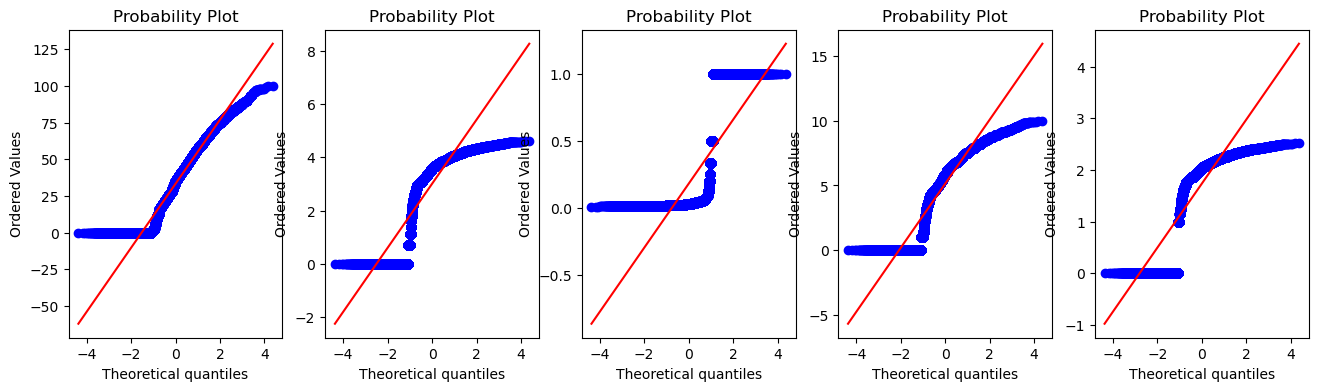

duration_ms original skewness: 10.814434004933338
logarithmic: -0.31958068443270016
reciprocal:  5.062710652230053
square-root: 1.7918392897162523
exponential: 0.3280005714079256


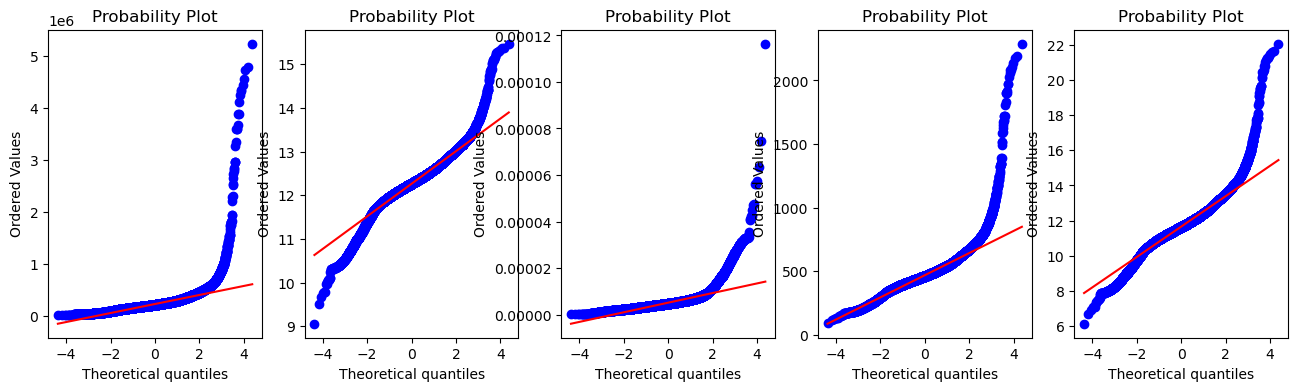

danceability original skewness: -0.4003991295600715
logarithmic: -0.7033043814280042
reciprocal:  1.0423257462450115
square-root: -1.078209424796711
exponential: -3.4689794311862756


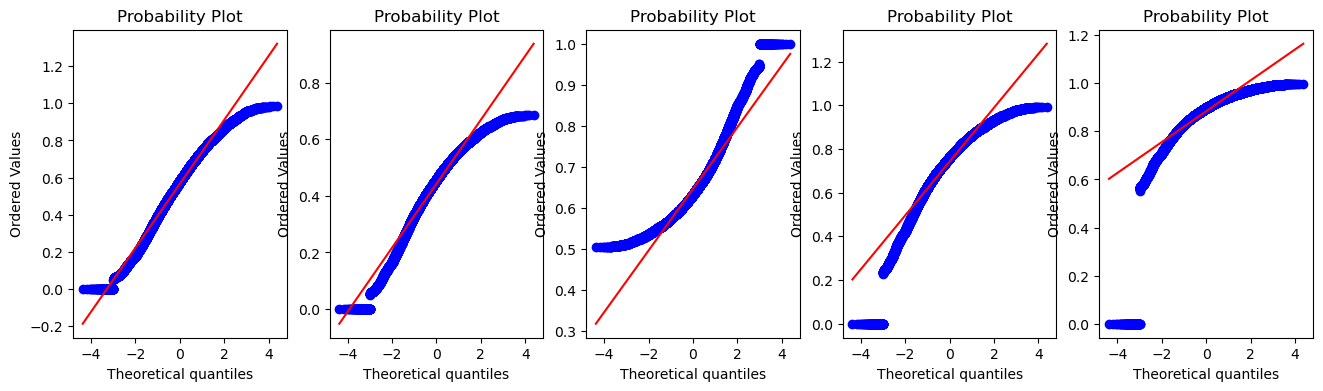

energy original skewness: -0.598542182428158
logarithmic: -0.8969101507400357
reciprocal:  1.2350332519840488
square-root: -1.2697363940462225
exponential: -2.2008891779513866


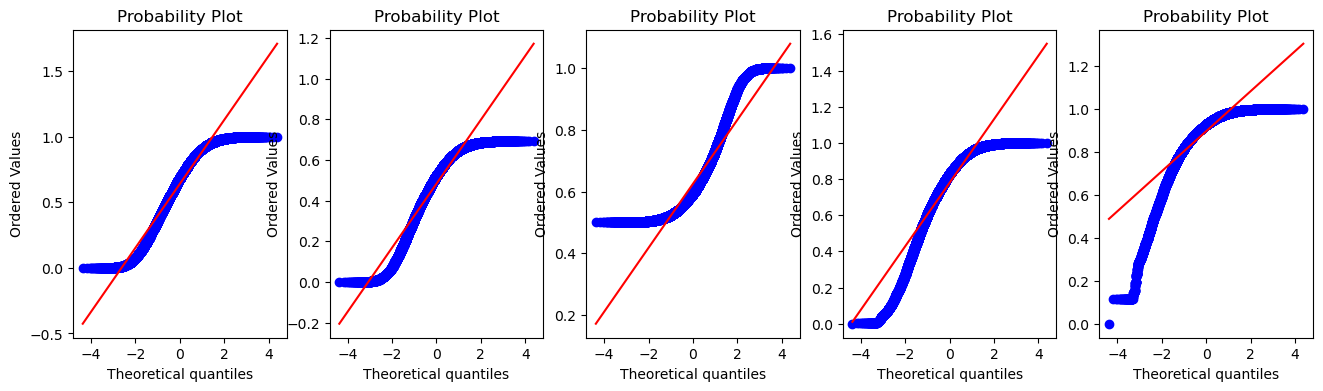

loudness original skewness: -2.0133133823721505
logarithmic: nan
reciprocal:  44.341700995068464
square-root: nan
exponential: nan


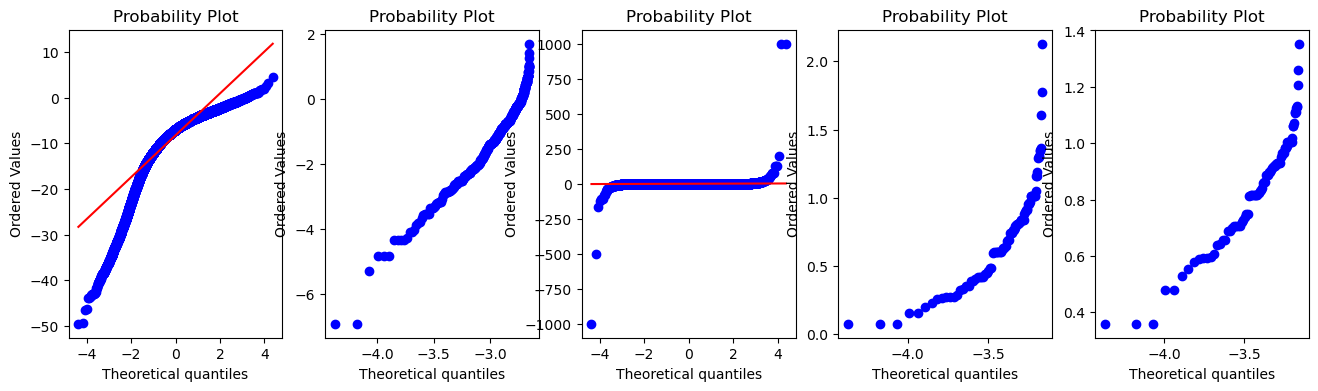

speechiness original skewness: 4.644508700286168
logarithmic: 3.7094268216147412
reciprocal:  -3.0189124109405174
square-root: 2.5106804244132315
exponential: 1.2585346167026825


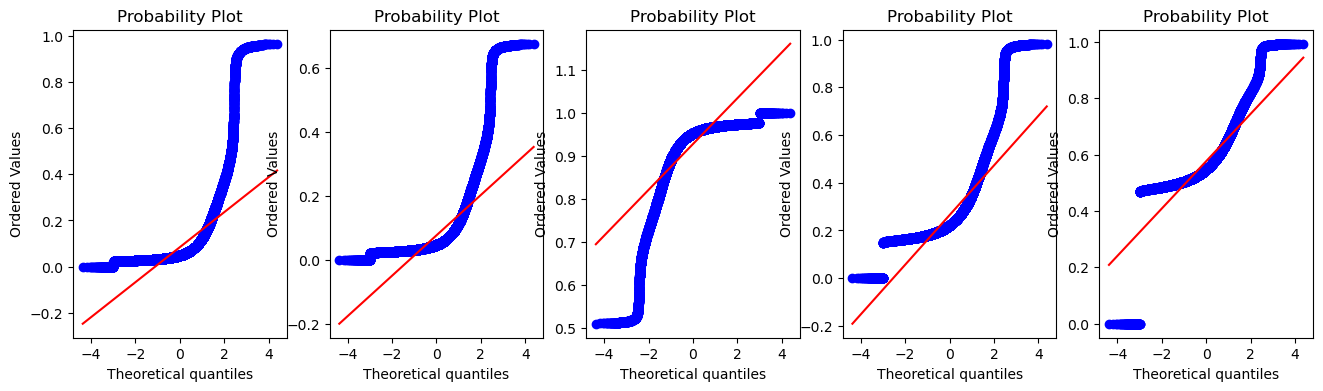

acousticness original skewness: 0.7302103030827026
logarithmic: 0.5532779927877304
reciprocal:  -0.3889970180312751
square-root: 0.19182418700584433
exponential: -0.45691650644198106


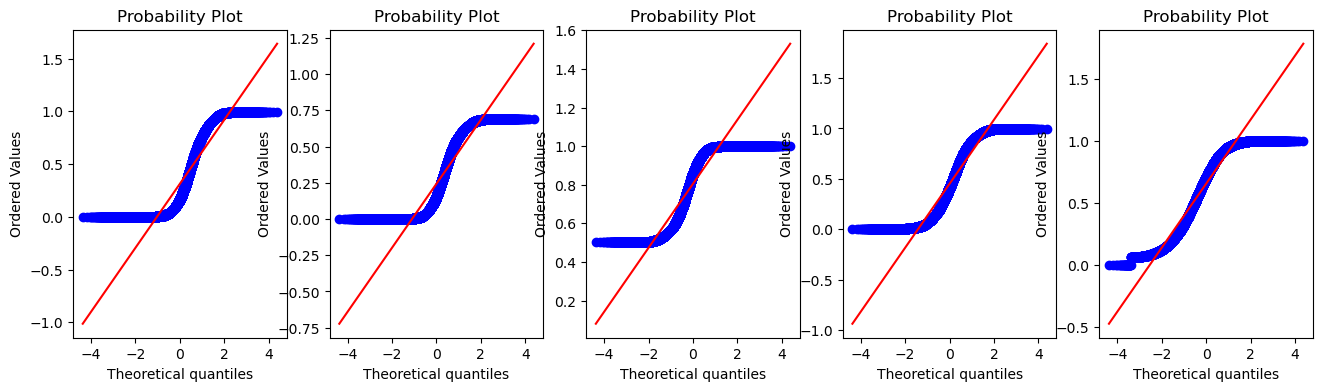

instrumentalness original skewness: 1.7377466866935405
logarithmic: 1.6547543527716166
reciprocal:  -1.5785769487599546
square-root: 1.4467885078056792
exponential: 0.929297080678929


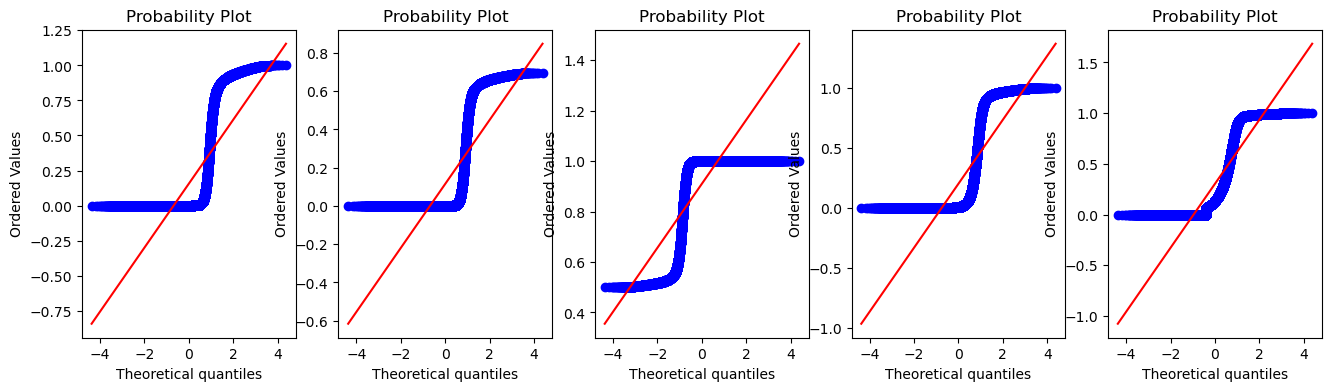

liveness original skewness: 2.1054497237799685
logarithmic: 1.7355487100916003
reciprocal:  -1.409425059871828
square-root: 1.3311332380750938
exponential: 0.8567637835174635


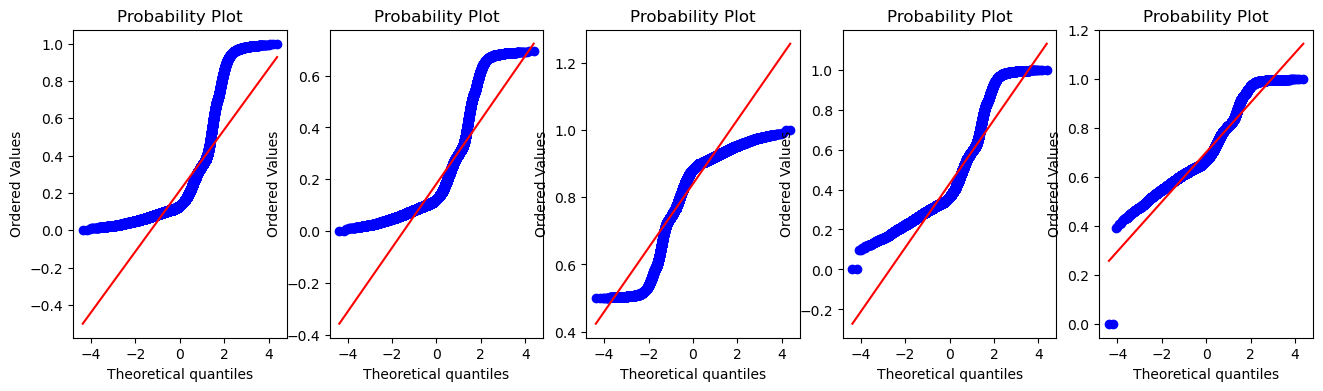

valence original skewness: 0.11477275798096229
logarithmic: -0.14268054744317982
reciprocal:  0.40566649459831094
square-root: -0.4685261380695686
exponential: -1.3963500280712502


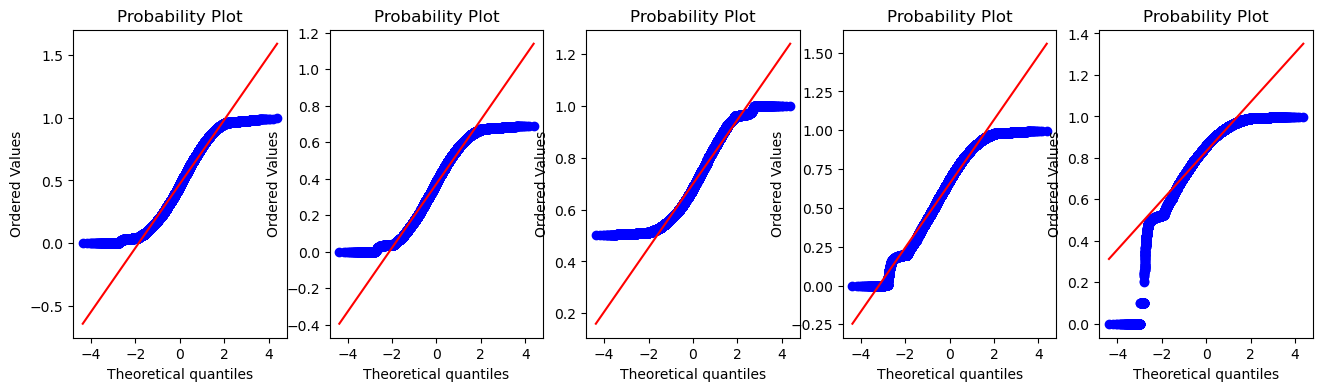

tempo original skewness: 0.23160111991386964
logarithmic: -5.502750438724598
reciprocal:  26.694049451308892
square-root: -0.5935911783686282
exponential: -5.885488448988584


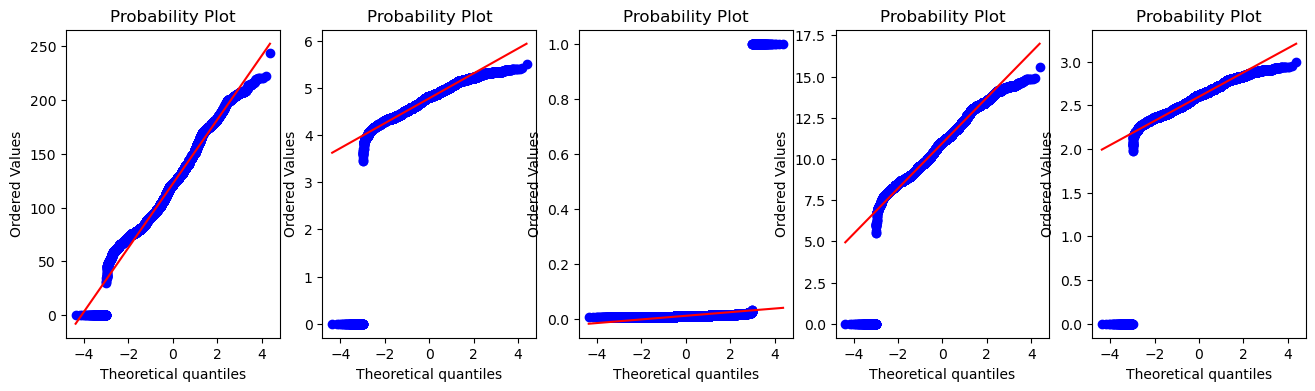

In [28]:
for feature in feature_continuous_numerical:
    plt.figure(figsize=(16,4))
    plt.subplot(1,5,1)
    print(feature, 'original skewness:', skew(data[feature]))
    stats.probplot(data[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,2)
    print('logarithmic:', skew(dataset_log[feature]))
    stats.probplot(dataset_log[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,3)
    print('reciprocal: ', skew(dataset_reci[feature]))
    stats.probplot(dataset_reci[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,4)
    print('square-root:', skew(dataset_sqrt[feature]))
    stats.probplot(dataset_sqrt[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,5)
    print('exponential:', skew(dataset_expo[feature]))
    stats.probplot(dataset_expo[feature], dist='norm', plot=plt)
    
    plt.show()

**Observations:**
1. None of the methods improve the skewness for popularity, danceability, energy, valence, tempo. It is better if the popularity, danceability, energy, valence, tempo is not transformed as it was already less skewed.
2. Exponential and logarithmic transformation gave good results for duration_ms.
3. For loudness, since there are negative values, exponential and logarityhmic transformations don't work. Reciprocal do not give good results.
4. speechiness, instrumentalness, liveness is dealt well by exponential transformation.
5. acousticness is best dealt by square-root transformation.

So, we would apply square root transformation to acousticness. Exponential transformation to speechiness, instrumentalness, liveness, duration_ms.

Before doing any transformation, we can separate the data for regression and the other models.

In [29]:
data['acousticness']=data['acousticness']**(1/2)
data[['speechiness','instrumentalness','liveness','duration_ms']]=data[['speechiness','instrumentalness','liveness','duration_ms']]**(1/5)

In [30]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.715,87.917,4,acoustic,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.267,77.489,4,acoustic,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.120,76.332,4,acoustic,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.143,181.740,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.167,119.949,4,acoustic,Low


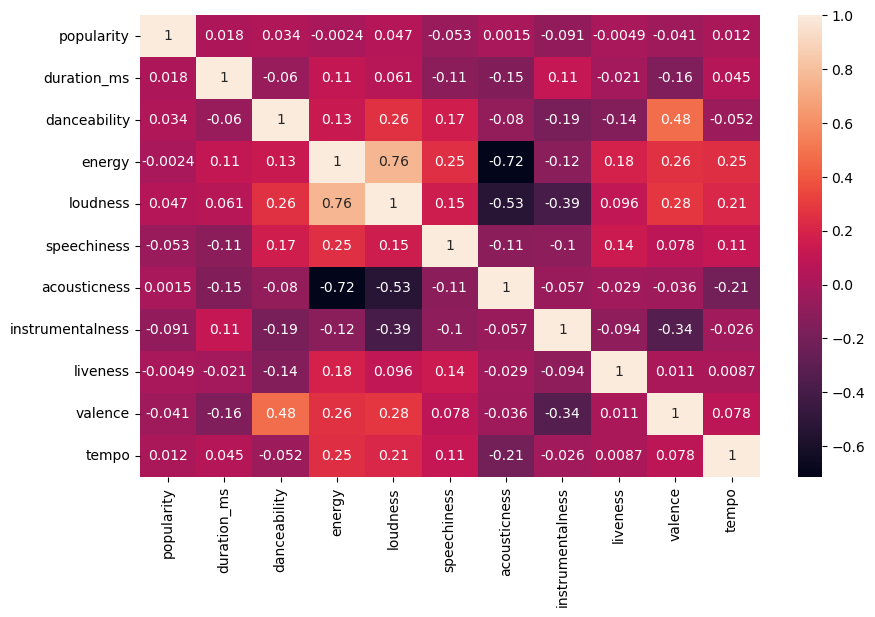

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(data[feature_continuous_numerical].corr(), annot=True)
plt.show()

### Encoding the categorical columns:

In [32]:
feature_categorical=[feature for feature in data.columns if feature not in feature_numerical]

In [33]:
feature_categorical

['track_id',
 'artists',
 'album_name',
 'track_name',
 'track_genre',
 'speechiness_type']

In [34]:
dataset=data.copy()
for feature in feature_categorical:
    print(feature,': {}, missing values {}'.format(data[feature].nunique(), data[feature].isna().sum()))

track_id : 89740, missing values 0
artists : 31437, missing values 0
album_name : 46589, missing values 0
track_name : 73608, missing values 0
track_genre : 114, missing values 0
speechiness_type : 3, missing values 0


track_id, track_name are unique features. The track name and album name should not affect the popularity as we would not decide a song's popualarity based on its name. However, the track genre can definitely affect the popularity as it would depend on the individual which genre they like. The artist name can also affect the song's popularity as a famed artist is likely to have more popular tracks. So we would encode only artist, track_genre and speechiness_type columns.

speechiness_type can be converted with one-hot encoding (precisely dummy encoding). As number of features in track_genre is high, so we can use BaseN encoding method.

In [35]:
conda install -c conda-forge category_encoders

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1




In [36]:
pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

In [37]:
import category_encoders as ce

In [38]:
dataset=data.copy()
encoder=ce.BaseNEncoder(cols=['track_genre'], base=10, return_df=True)

In [39]:
dataset_encoded=encoder.fit_transform(dataset)
dataset_encoded

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.7150,87.917,4,0,0,1,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.2670,77.489,4,0,0,1,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.1200,76.332,4,0,0,1,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.1430,181.740,3,0,0,1,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.1670,119.949,4,0,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,13.094590,False,0.172,0.2350,5,-16.393,1,0.530961,0.800000,0.985166,0.612636,0.0339,125.995,5,1,1,4,Low
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,13.094597,False,0.174,0.1170,0,-18.318,0,0.525568,0.996995,0.995153,0.637144,0.0350,85.239,4,1,1,4,Low
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,12.210771,False,0.629,0.3290,0,-10.895,0,0.530457,0.931128,0.000000,0.609189,0.7430,132.378,4,1,1,4,Low
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,12.320574,False,0.587,0.5060,7,-10.889,1,0.494939,0.617252,0.000000,0.769614,0.4130,135.960,4,1,1,4,Low


In [40]:
dataset_encoded=pd.get_dummies(data=dataset_encoded, columns=['speechiness_type'], drop_first=True)

In [41]:
dataset_encoded

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.7150,87.917,4,0,0,1,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.2670,77.489,4,0,0,1,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.1200,76.332,4,0,0,1,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.1430,181.740,3,0,0,1,1,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.1670,119.949,4,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,13.094590,False,0.172,0.2350,5,-16.393,1,0.530961,0.800000,0.985166,0.612636,0.0339,125.995,5,1,1,4,1,0
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,13.094597,False,0.174,0.1170,0,-18.318,0,0.525568,0.996995,0.995153,0.637144,0.0350,85.239,4,1,1,4,1,0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,12.210771,False,0.629,0.3290,0,-10.895,0,0.530457,0.931128,0.000000,0.609189,0.7430,132.378,4,1,1,4,1,0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,12.320574,False,0.587,0.5060,7,-10.889,1,0.494939,0.617252,0.000000,0.769614,0.4130,135.960,4,1,1,4,1,0


In [42]:
dataset_encoded

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.7150,87.917,4,0,0,1,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.2670,77.489,4,0,0,1,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.1200,76.332,4,0,0,1,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.1430,181.740,3,0,0,1,1,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.1670,119.949,4,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,13.094590,False,0.172,0.2350,5,-16.393,1,0.530961,0.800000,0.985166,0.612636,0.0339,125.995,5,1,1,4,1,0
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,13.094597,False,0.174,0.1170,0,-18.318,0,0.525568,0.996995,0.995153,0.637144,0.0350,85.239,4,1,1,4,1,0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,12.210771,False,0.629,0.3290,0,-10.895,0,0.530457,0.931128,0.000000,0.609189,0.7430,132.378,4,1,1,4,1,0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,12.320574,False,0.587,0.5060,7,-10.889,1,0.494939,0.617252,0.000000,0.769614,0.4130,135.960,4,1,1,4,1,0


In [43]:
encoder2=ce.BaseNEncoder(cols=['album_name', 'track_name'], base=10, return_df=True)
dataset_encoded=encoder2.fit_transform(dataset_encoded)
dataset_encoded

,track_id,artists,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,track_name_0,track_name_1,track_name_2,track_name_3,track_name_4,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,0,0,0,0,1,0,0,0,0,1,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.7150,87.917,4,0,0,1,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,0,0,0,0,2,0,0,0,0,2,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.2670,77.489,4,0,0,1,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,0,0,0,0,3,0,0,0,0,3,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.1200,76.332,4,0,0,1,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,0,0,0,0,4,0,0,0,0,4,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.1430,181.740,3,0,0,1,1,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,0,0,0,0,5,0,0,0,0,5,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.1670,119.949,4,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,4,6,4,5,2,7,3,6,0,5,21,13.094590,False,0.172,0.2350,5,-16.393,1,0.530961,0.800000,0.985166,0.612636,0.0339,125.995,5,1,1,4,1,0
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,4,6,4,5,2,7,3,6,0,6,22,13.094597,False,0.174,0.1170,0,-18.318,0,0.525568,0.996995,0.995153,0.637144,0.0350,85.239,4,1,1,4,1,0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,0,4,0,8,4,7,3,6,0,7,22,12.210771,False,0.629,0.3290,0,-10.895,0,0.530457,0.931128,0.000000,0.609189,0.7430,132.378,4,1,1,4,1,0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,4,6,4,1,0,0,1,6,5,2,41,12.320574,False,0.587,0.5060,7,-10.889,1,0.494939,0.617252,0.000000,0.769614,0.4130,135.960,4,1,1,4,1,0


In [44]:
#Applying to the data itself.
encoder1=ce.BaseNEncoder(cols=['track_genre','album_name', 'track_name','artists'], base=10, return_df=True)
data=encoder1.fit_transform(data)
data.head()

,track_id,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,track_name_0,track_name_1,track_name_2,track_name_3,track_name_4,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.715,87.917,4,0,0,1,Low
1,4qPNDBW1i3p13qLCt0Ki3A,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.267,77.489,4,0,0,1,Low
2,1iJBSr7s7jYXzM8EGcbK5b,0,0,0,0,3,0,0,0,0,3,0,0,0,0,3,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.120,76.332,4,0,0,1,Low
3,6lfxq3CG4xtTiEg7opyCyx,0,0,0,0,4,0,0,0,0,4,0,0,0,0,4,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.143,181.740,3,0,0,1,Low
4,5vjLSffimiIP26QG5WcN2K,0,0,0,0,5,0,0,0,0,5,0,0,0,0,5,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.167,119.949,4,0,0,1,Low


In [45]:
data=pd.get_dummies(data=data, columns=['speechiness_type'], drop_first=True)
print(data.shape)
data.head()

(113549, 36)


,track_id,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,track_name_0,track_name_1,track_name_2,track_name_3,track_name_4,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,5SuOikwiRyPMVoIQDJUgSV,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.715,87.917,4,0,0,1,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.267,77.489,4,0,0,1,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,0,0,0,0,3,0,0,0,0,3,0,0,0,0,3,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.120,76.332,4,0,0,1,1,0
3,6lfxq3CG4xtTiEg7opyCyx,0,0,0,0,4,0,0,0,0,4,0,0,0,0,4,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.143,181.740,3,0,0,1,1,0
4,5vjLSffimiIP26QG5WcN2K,0,0,0,0,5,0,0,0,0,5,0,0,0,0,5,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.167,119.949,4,0,0,1,1,0


In [46]:
data.isna().sum()

track_id                   0
artists_0                  0
artists_1                  0
artists_2                  0
artists_3                  0
artists_4                  0
album_name_0               0
album_name_1               0
album_name_2               0
album_name_3               0
album_name_4               0
track_name_0               0
track_name_1               0
track_name_2               0
track_name_3               0
track_name_4               0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre_0              0
track_genre_1              0
track_genre_2              0
speechiness_ty

#### Feature Scaling

Questions:
1. Is it required to scale the categorical features as well after encoding with BaseN encoder?
2. Is Boolean column needs to be converted as well?
    

In [47]:
data['explicit']=np.where(data['explicit']==False, 0,1)

In [48]:
data.head()

,track_id,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,track_name_0,track_name_1,track_name_2,track_name_3,track_name_4,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,5SuOikwiRyPMVoIQDJUgSV,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,73,11.819435,0,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.715,87.917,4,0,0,1,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,55,10.839073,0,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.267,77.489,4,0,0,1,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,0,0,0,0,3,0,0,0,0,3,0,0,0,0,3,57,11.608733,0,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.120,76.332,4,0,0,1,1,0
3,6lfxq3CG4xtTiEg7opyCyx,0,0,0,0,4,0,0,0,0,4,0,0,0,0,4,71,11.509103,0,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.143,181.740,3,0,0,1,1,0
4,5vjLSffimiIP26QG5WcN2K,0,0,0,0,5,0,0,0,0,5,0,0,0,0,5,82,11.473778,0,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.167,119.949,4,0,0,1,1,0


In [49]:
feature_numerical

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaling=[feature for feature in feature_numerical if feature not in ['popularity','mode']]
scaler.fit(data[features_scaling])

StandardScaler()

In [51]:
scaler.transform(data[features_scaling])

array([[ 0.1853255 , -0.30593202,  0.62839367, ...,  0.92898358,
        -1.14299362,  0.22165951],
       [-0.92488754, -0.30593202, -0.84789057, ..., -0.79939532,
        -1.4909088 ,  0.22165951],
       [-0.053284  , -0.30593202, -0.74408933, ..., -1.36651965,
        -1.52951044,  0.22165951],
       ...,
       [ 0.62849465, -0.30593202,  0.35735711, ...,  1.03700726,
         0.34038354,  0.22165951],
       [ 0.75284102, -0.30593202,  0.11515423, ..., -0.23612898,
         0.4598918 ,  0.22165951],
       [ 0.31240644, -0.30593202, -0.23661663, ...,  0.90197766,
        -1.43389048,  0.22165951]])

In [52]:
data_to_replace=pd.DataFrame(scaler.transform(data[features_scaling]), columns=features_scaling)

In [53]:
data_to_replace.head()

,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.185325,-0.305932,0.628394,-0.721328,-1.210476,0.298800,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660
1,-0.924888,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660
2,-0.053284,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660
3,-0.166111,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538
4,-0.206115,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660


In [54]:
data_to_replace.isna().sum()

duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [55]:
#Checking the repalce option
dataset=data.copy()
for feature in features_scaling:
    dataset[feature]=data_to_replace[feature]
    
            

In [56]:
dataset.head()

,track_id,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,track_name_0,track_name_1,track_name_2,track_name_3,track_name_4,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,5SuOikwiRyPMVoIQDJUgSV,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,73,0.185325,-0.305932,0.628394,-0.721328,-1.210476,0.298800,0,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660,0,0,1,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,55,-0.924888,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,1,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660,0,0,1,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,0,0,0,0,3,0,0,0,0,3,0,0,0,0,3,57,-0.053284,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,1,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660,0,0,1,1,0
3,6lfxq3CG4xtTiEg7opyCyx,0,0,0,0,4,0,0,0,0,4,0,0,0,0,4,71,-0.166111,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,1,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538,0,0,1,1,0
4,5vjLSffimiIP26QG5WcN2K,0,0,0,0,5,0,0,0,0,5,0,0,0,0,5,82,-0.206115,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,1,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660,0,0,1,1,0


In [57]:
dataset.isna().sum()

track_id                     0
artists_0                    0
artists_1                    0
artists_2                    0
artists_3                    0
artists_4                    0
album_name_0                 0
album_name_1                 0
album_name_2                 0
album_name_3                 0
album_name_4                 0
track_name_0                 0
track_name_1                 0
track_name_2                 0
track_name_3                 0
track_name_4                 0
popularity                   0
duration_ms                451
explicit                   451
danceability               451
energy                     451
key                        451
loudness                   451
mode                         0
speechiness                451
acousticness               451
instrumentalness           451
liveness                   451
valence                    451
tempo                      451
time_signature             451
track_genre_0                0
track_ge

**This was giving Nan values while replacing.**

In [58]:
dataset2=data.copy()
for feature in features_scaling:
    dataset2[feature]=data_to_replace[feature].values

In [59]:
dataset2.isna().sum()

track_id                   0
artists_0                  0
artists_1                  0
artists_2                  0
artists_3                  0
artists_4                  0
album_name_0               0
album_name_1               0
album_name_2               0
album_name_3               0
album_name_4               0
track_name_0               0
track_name_1               0
track_name_2               0
track_name_3               0
track_name_4               0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre_0              0
track_genre_1              0
track_genre_2              0
speechiness_ty

In [60]:
for feature in features_scaling:
    data[feature]=data_to_replace[feature].values

In [61]:
data.head()

,track_id,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,track_name_0,track_name_1,track_name_2,track_name_3,track_name_4,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,5SuOikwiRyPMVoIQDJUgSV,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,73,0.185325,-0.305932,0.628394,-0.721328,-1.210476,0.298800,0,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660,0,0,1,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,55,-0.924888,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,1,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660,0,0,1,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,0,0,0,0,3,0,0,0,0,3,0,0,0,0,3,57,-0.053284,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,1,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660,0,0,1,1,0
3,6lfxq3CG4xtTiEg7opyCyx,0,0,0,0,4,0,0,0,0,4,0,0,0,0,4,71,-0.166111,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,1,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538,0,0,1,1,0
4,5vjLSffimiIP26QG5WcN2K,0,0,0,0,5,0,0,0,0,5,0,0,0,0,5,82,-0.206115,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,1,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660,0,0,1,1,0


In [62]:
data.isna().sum()

track_id                   0
artists_0                  0
artists_1                  0
artists_2                  0
artists_3                  0
artists_4                  0
album_name_0               0
album_name_1               0
album_name_2               0
album_name_3               0
album_name_4               0
track_name_0               0
track_name_1               0
track_name_2               0
track_name_3               0
track_name_4               0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre_0              0
track_genre_1              0
track_genre_2              0
speechiness_ty

In [63]:
data.to_csv('E://DS Projects//Spotify Song Prediction//dataset_processed.csv', index=False)